In [5]:
!pip install scipy

In [67]:
import os, shutil

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [73]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64,64,3))

conv_base.trainable=False


classifier = Sequential()

# classifier.add(conv_base)

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Flatten())
classifier.add(Dropout(0.5))
classifier.add(Dense(12, activation='relu'))
# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(3))
classifier.add(Activation(activation='softmax'))

In [74]:
train_imagedata = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_imagedata = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [75]:

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training_set = train_imagedata.flow_from_directory('training_set', target_size=(64, 64), batch_size=5, class_mode='categorical')
val_set = test_imagedata.flow_from_directory('test_set'
        , target_size=(64, 64), batch_size=5, class_mode='categorical')


history=classifier.fit_generator(training_set, steps_per_epoch=3, epochs=30,
                         validation_data=val_set,
                         validation_steps=3)

Found 36 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Epoch 1/30
3/3 [==============================] - 3s 955ms/step - loss: 1.1437 - accuracy: 0.3636 - val_loss: 1.2149 - val_accuracy: 0.2857
Epoch 2/30
3/3 [==============================] - 2s 535ms/step - loss: 1.2517 - accuracy: 0.3333 - val_loss: 1.1209 - val_accuracy: 0.2857
Epoch 3/30
3/3 [==============================] - 1s 486ms/step - loss: 1.1463 - accuracy: 0.2000 - val_loss: 1.0991 - val_accuracy: 0.2857
Epoch 4/30
3/3 [==============================] - 1s 399ms/step - loss: 1.0986 - accuracy: 0.1818 - val_loss: 1.0986 - val_accuracy: 0.3571
Epoch 5/30
3/3 [==============================] - 1s 433ms/step - loss: 1.0973 - accuracy: 0.2000 - val_loss: 1.0973 - val_accuracy: 0.3571
Epoch 6/30
3/3 [==============================] - 2s 751ms/step - loss: 1.0849 - accuracy: 0.4667 - val_loss: 1.0985 - val_accuracy: 0.3571
Epoch 7/30
3/3 [==============================] - 2s 504ms/step - loss: 1.0898 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


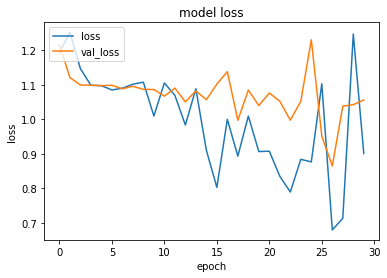

In [76]:
print(history.history.keys())
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

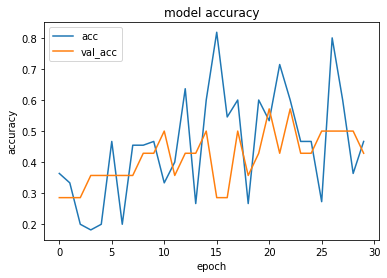

In [77]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [78]:
test_image = image.load_img('test/11.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.0000000e+00, 1.2834274e-16, 1.0000000e+00]], dtype=float32)

In [80]:
model_json = classifier.to_json()
with open('model.json', 'w') as model_file:
    model_file.write(model_json)
    
classifier.save_weights('model.h5')

In [60]:
!pip freeze -r 'model_requirements.txt'

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 188, in main
    status = self.run(options, args)
  File "C:\ProgramData\Miniconda3\lib\site-packages\pip\_internal\commands\freeze.py", line 98, in run
    for line in freeze(**freeze_kwargs):
  File "C:\ProgramData\Miniconda3\lib\site-packages\pip\_internal\operations\freeze.py", line 89, in freeze
    with open(req_file_path) as req_file:
FileNotFoundError: [Errno 2] No such file or directory: "'model_requirements.txt'"


In [61]:
!pip freeze

absl-py==0.8.1
asn1crypto==1.0.1
astor==0.8.0
attrs==19.2.0
backcall==0.1.0
bleach==3.1.0
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
colorama==0.4.1
conda==4.7.12
conda-package-handling==1.6.0
cryptography==2.7
cycler==0.10.0
decorator==4.4.0
defusedxml==0.6.0
entrypoints==0.3
gast==0.3.2
google-pasta==0.1.7
grpcio==1.24.1
h5py==2.10.0
idna==2.8
ipykernel==5.1.2
ipython==7.8.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.15.1
Jinja2==2.10.3
jsonschema==3.0.2
jupyter==1.0.0
jupyter-client==5.3.4
jupyter-console==6.0.0
jupyter-core==4.6.0
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.0
kiwisolver==1.1.0
Markdown==3.1.1
MarkupSafe==1.1.1
matplotlib==3.1.1
menuinst==1.4.16
mistune==0.8.4
mkl-fft==1.0.14
mkl-random==1.1.0
mkl-service==2.3.0
nbconvert==5.6.0
nbformat==4.4.0
notebook==6.0.1
numpy==1.17.3
olefile==0.46
pandocfilters==1.4.2
parso==0.5.1
pickleshare==0.7.5
Pillow==6.2.0
prometheus-client==0.7.1
prompt-toolkit==2.0.10
protobuf==3.10.0
pycosat==0.6.3
pycparser==2.19


In [82]:
import urllib.request

urllib.request.urlretrieve("http://www.etechknol.com/wp-content/uploads/2013/07/ddg.jpg", "local-filename.jpg")

('local-filename.jpg', <http.client.HTTPMessage at 0x27b040b1080>)

In [81]:

def load_model():

    with open("model.json", 'r') as model_file:
        model_json = model_file.read()

    model = model_from_json(model_json)

    model.load_weights('model.h5')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


def predict_class(model, image_path):

    image_file = image.load_img(image_path, target_size=(64, 64))
    image_file = image.img_to_array(image_file)
    image_file = np.expand_dims(image_file, axis=0)
    result = model.predict(image_file)[0]
    
    max_pred, max_class = 0, 0

    for i in range(len(result)):
        if result[i] > max_pred:
            max_pred = result[i]
            max_class = i

    if max_class == 0:
        return 'other'
    elif max_class == 1:
        return 'wild_fire'
    else:
        return 'residential_fire'


model = load_model()


urllib.request.urlretrieve("https://dsx.weather.com/util/image/v/nasareleases.jpg?v=at&w=1280&h=720&api=7db9fe61-7414-47b5-9871-e17d87b8b6a0", "image.jpg")
image_class = predict_class(model, 'image.jpg')
print(image_class)

residential_fire
